In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from process_text import clean_text, lemmatizing
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()
train_data_pth = os.getenv("TRAIN_DATA_PATH")
test_data_pth = os.getenv("TEST_DATA_PATH")

# Define constants
DPI = 300

In [4]:
train_df = pd.read_csv(train_data_pth)
test_df = pd.read_csv(test_data_pth)

In [5]:
print(train_df.head())
train_df.info()
train_df.describe(include='all')
train_df.isnull().sum()
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_df[label_cols].sum().sort_values(ascending=False)


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------

toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64

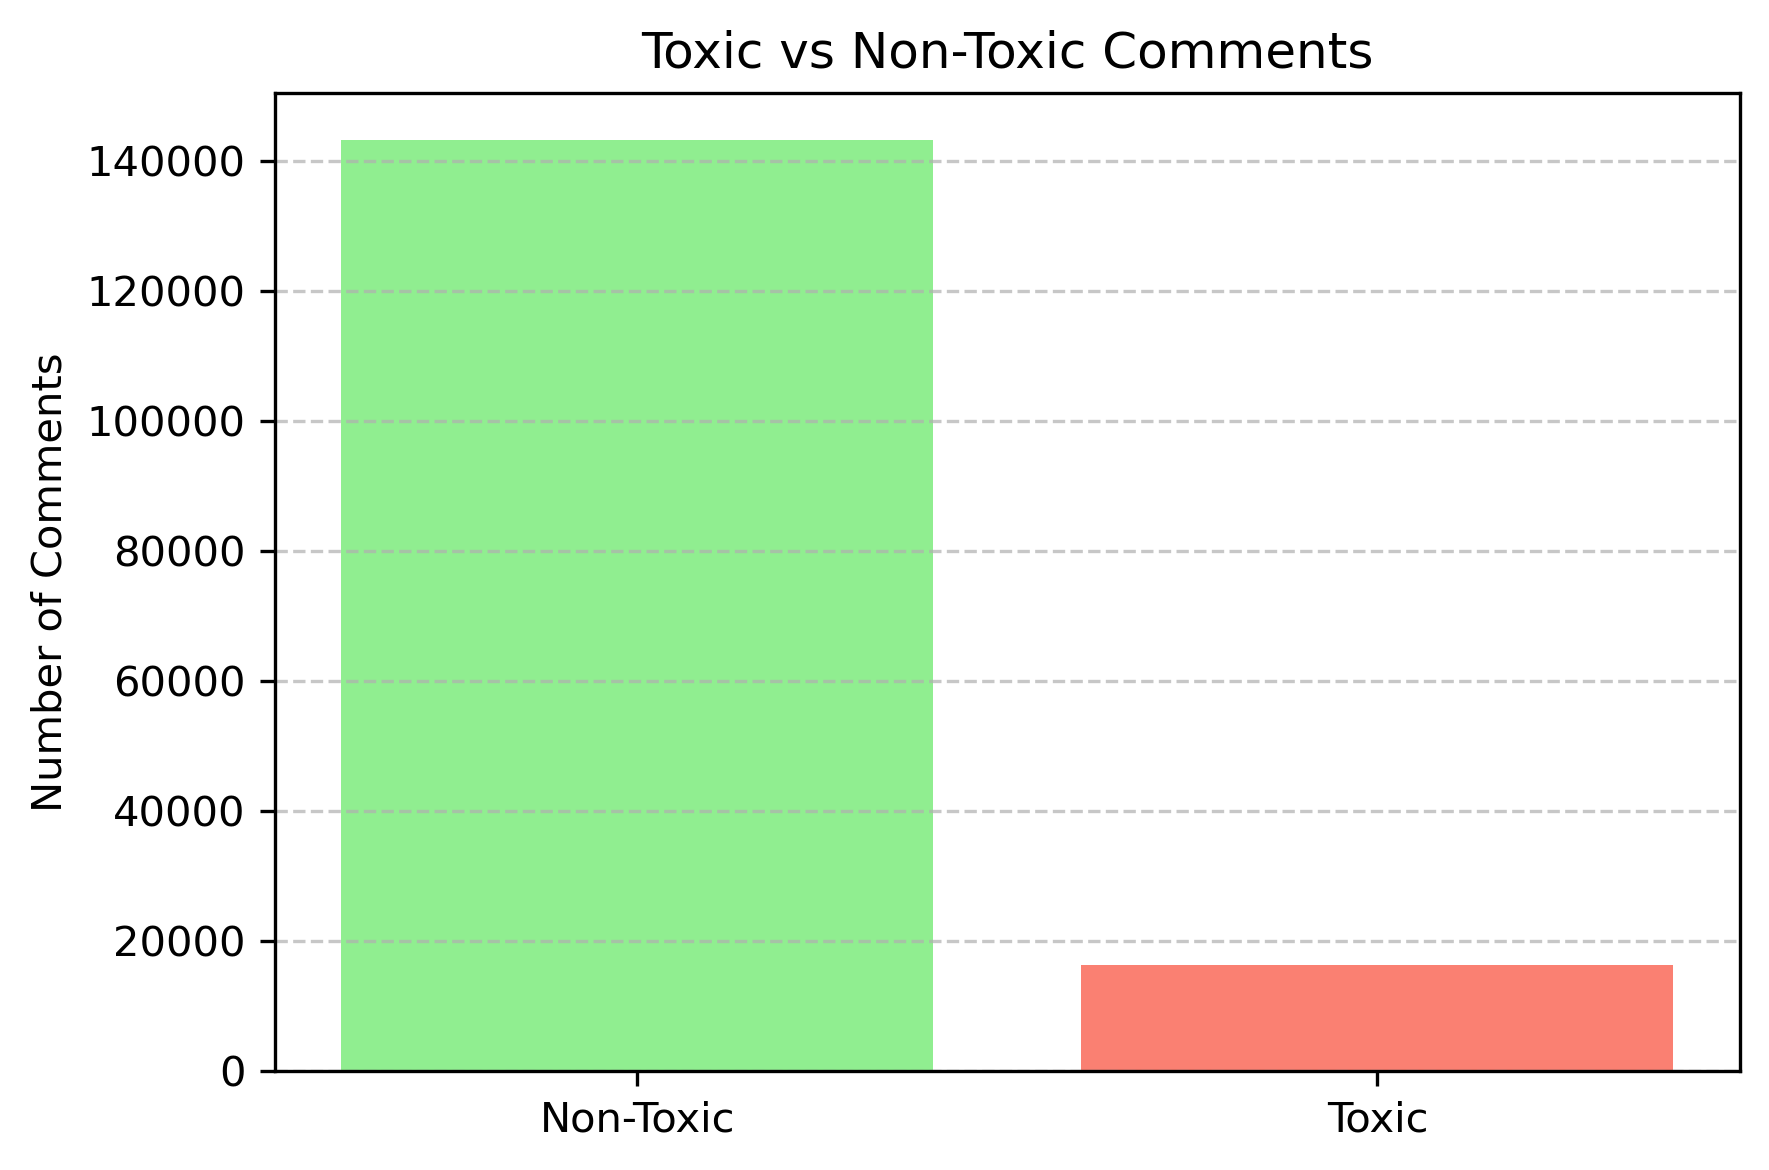

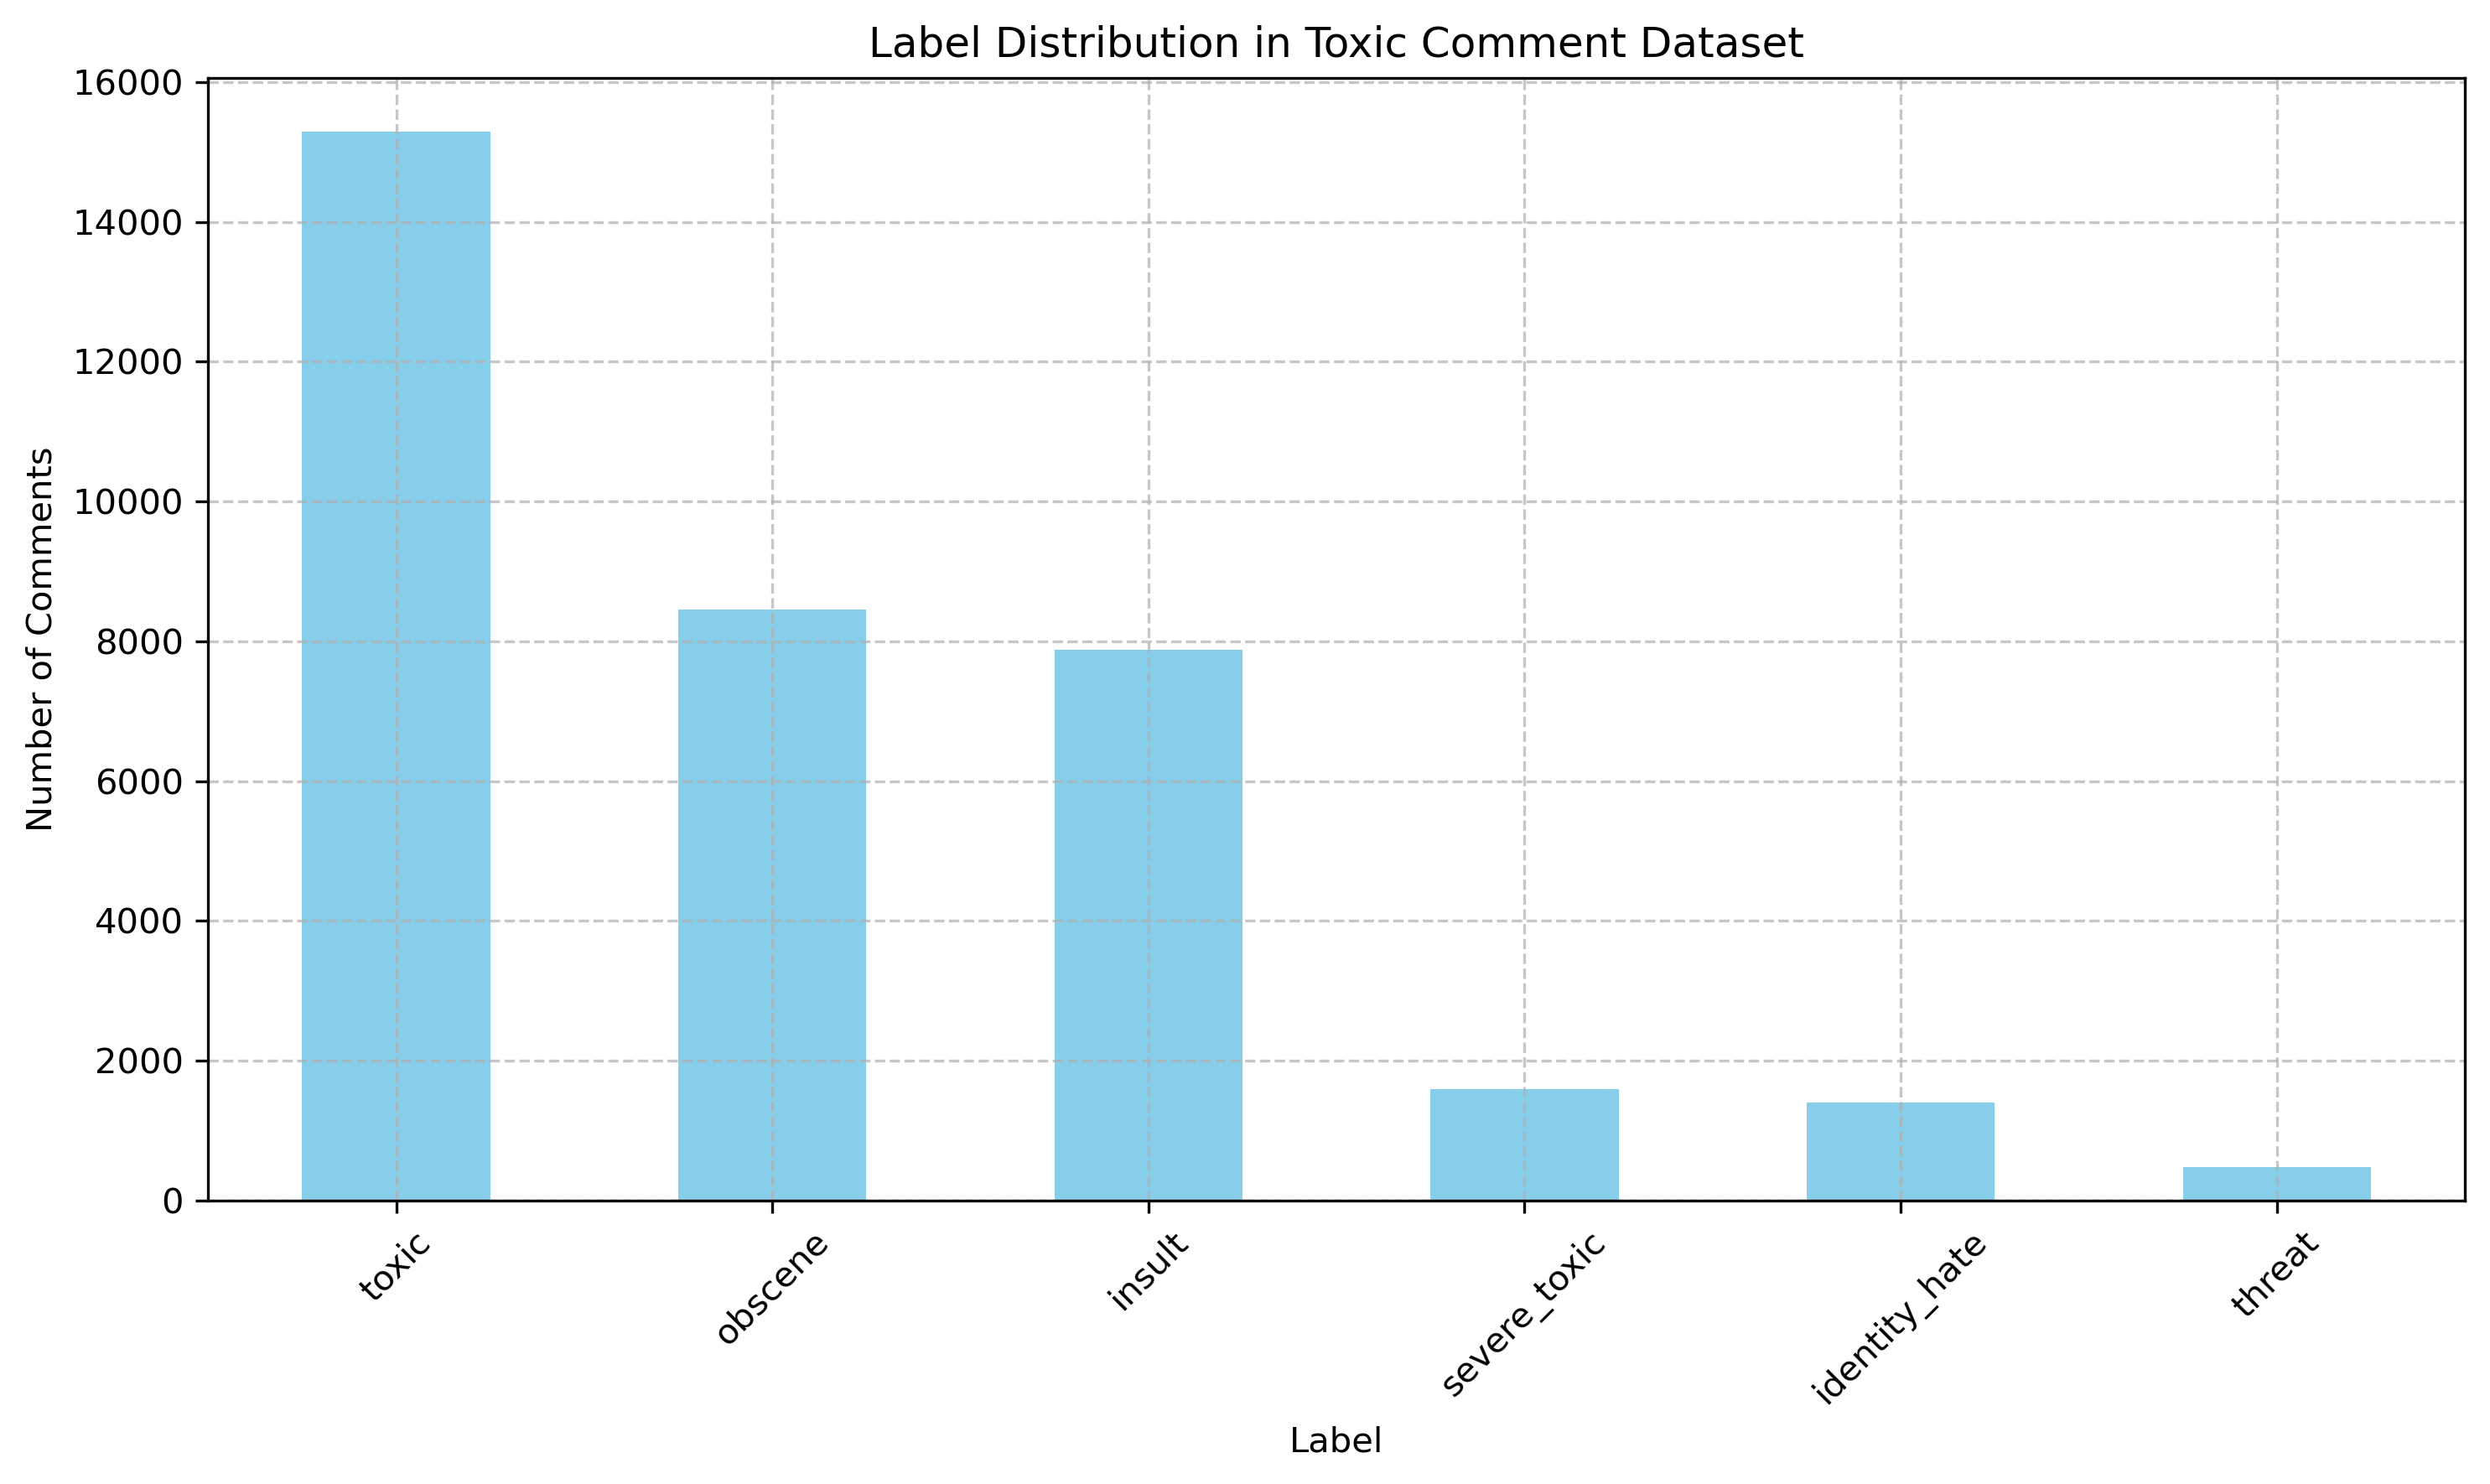

           Label  Count  Percentage
0          toxic  15294        9.58
1        obscene   8449        5.29
2         insult   7877        4.94
3   severe_toxic   1595        1.00
4  identity_hate   1405        0.88
5         threat    478        0.30


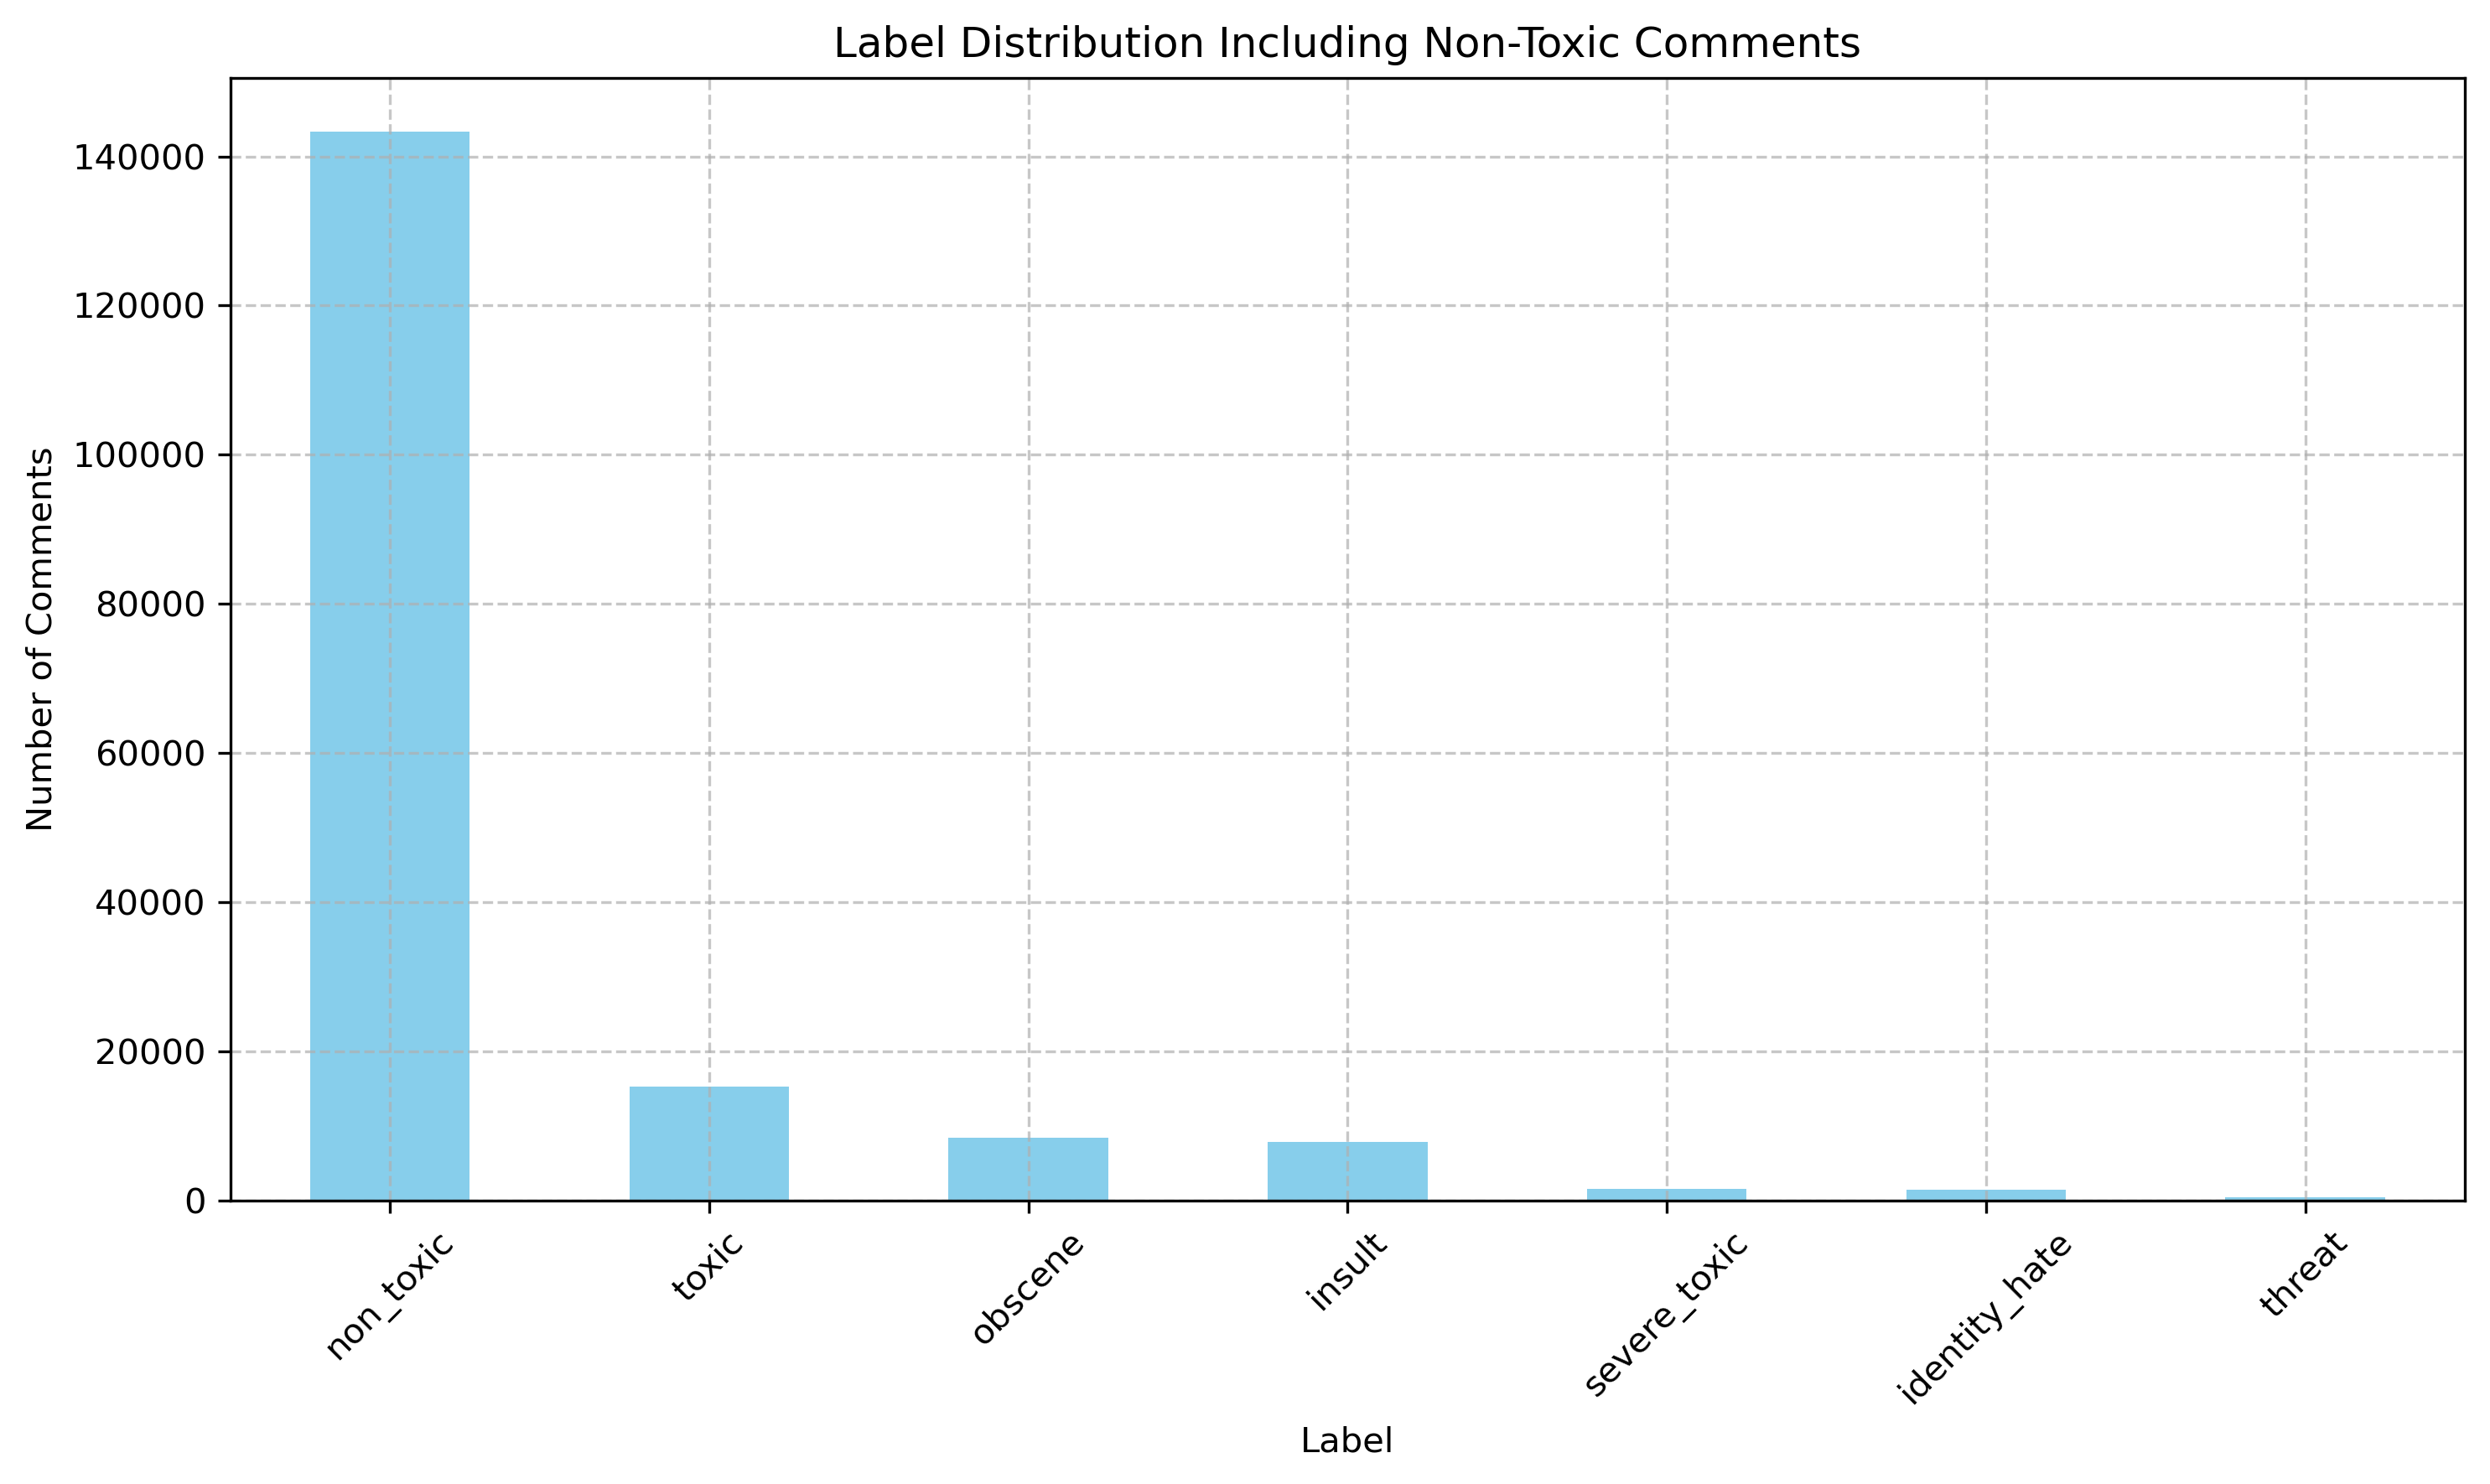

In [ ]:
# Define label columns
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Calculate label counts and sort
label_counts = train_df[label_cols].sum().sort_values(ascending=False)

# Total comments
total_comments = len(train_df)

# Number of non-toxic and toxic comments
train_df['num_labels'] = train_df[label_cols].sum(axis=1)
non_toxic_count = (train_df['num_labels'] == 0).sum()
toxic_count = total_comments - non_toxic_count

# Plot Toxic vs Non-Toxic
plt.figure(figsize=(6, 4), dpi=DPI)
plt.bar(['Non-Toxic', 'Toxic'], [non_toxic_count, toxic_count], color=['lightgreen', 'salmon'])
plt.title("Toxic vs Non-Toxic Comments")
plt.ylabel("Number of Comments")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot class distribution
plt.figure(figsize=(10, 6), dpi=DPI)
label_counts.plot(kind='bar', color='skyblue')
plt.title("Label Distribution in Toxic Comment Dataset")
plt.xlabel("Label")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display class imbalance stats as DataFrame
label_stats = pd.DataFrame({
    "Label": label_counts.index,
    "Count": label_counts.values,
    "Percentage": (label_counts.values / len(train_df) * 100).round(2)
})

print(label_stats)

# Add 'non_toxic' to label counts
label_counts_with_clean = label_counts.copy()
label_counts_with_clean['non_toxic'] = non_toxic_count
label_counts_with_clean = label_counts_with_clean.sort_values(ascending=False)

# Plot updated class distribution
plt.figure(figsize=(10, 6), dpi=DPI)
label_counts_with_clean.plot(kind='bar', color='skyblue')
plt.title("Label Distribution Including Non-Toxic Comments")
plt.xlabel("Label")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

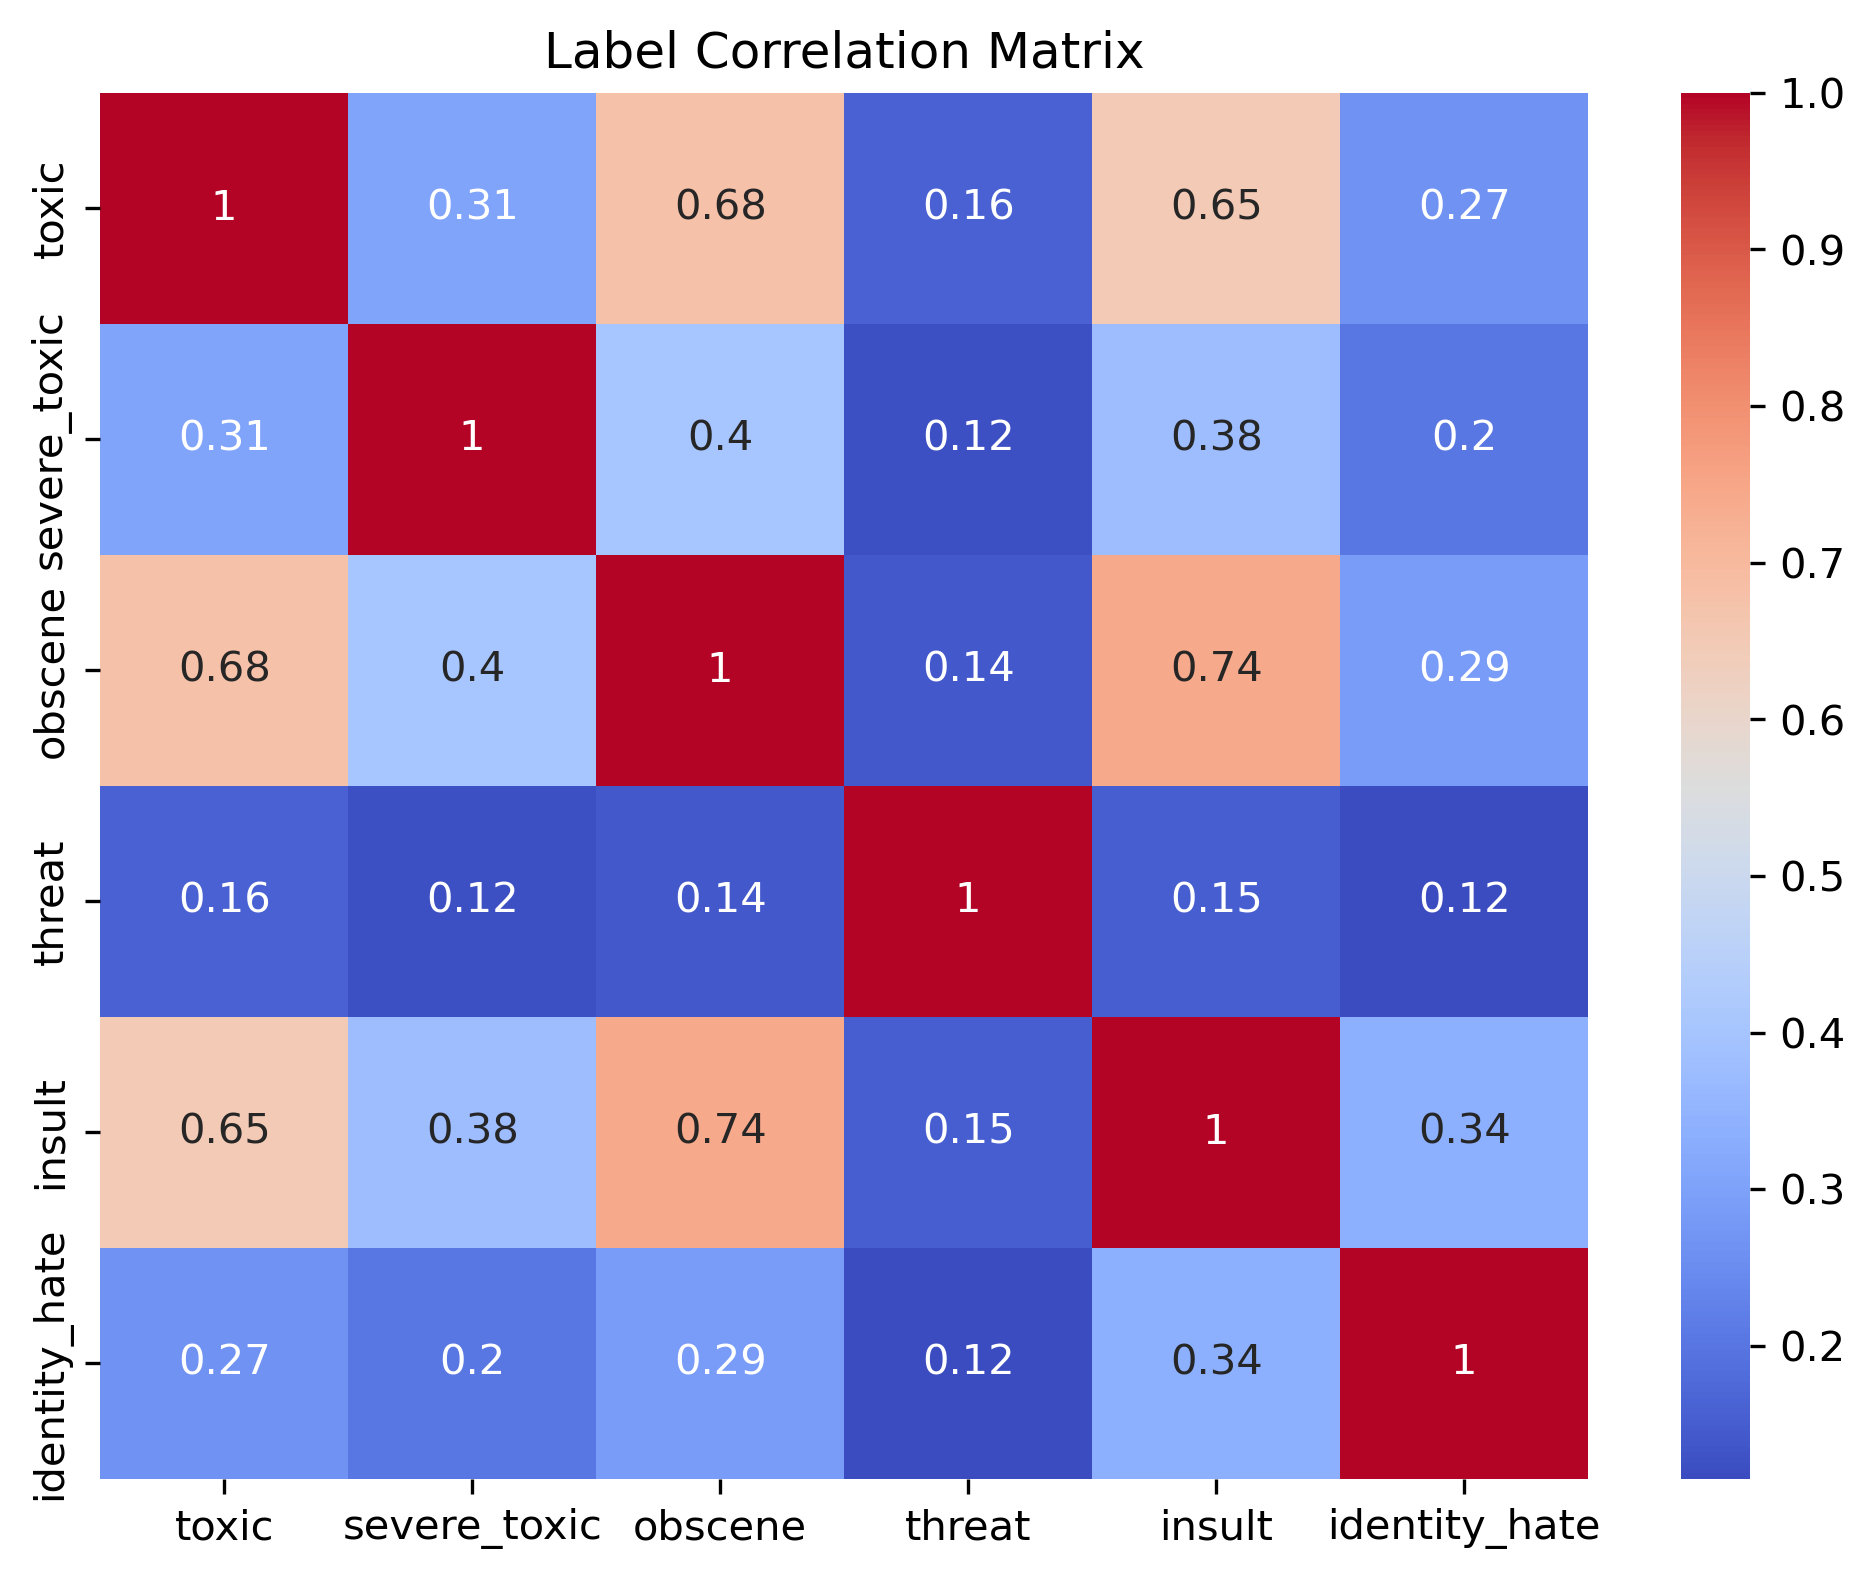

In [7]:
plt.figure(figsize=(8, 6), dpi=DPI)
corr = train_df[label_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Label Correlation Matrix")
plt.show()

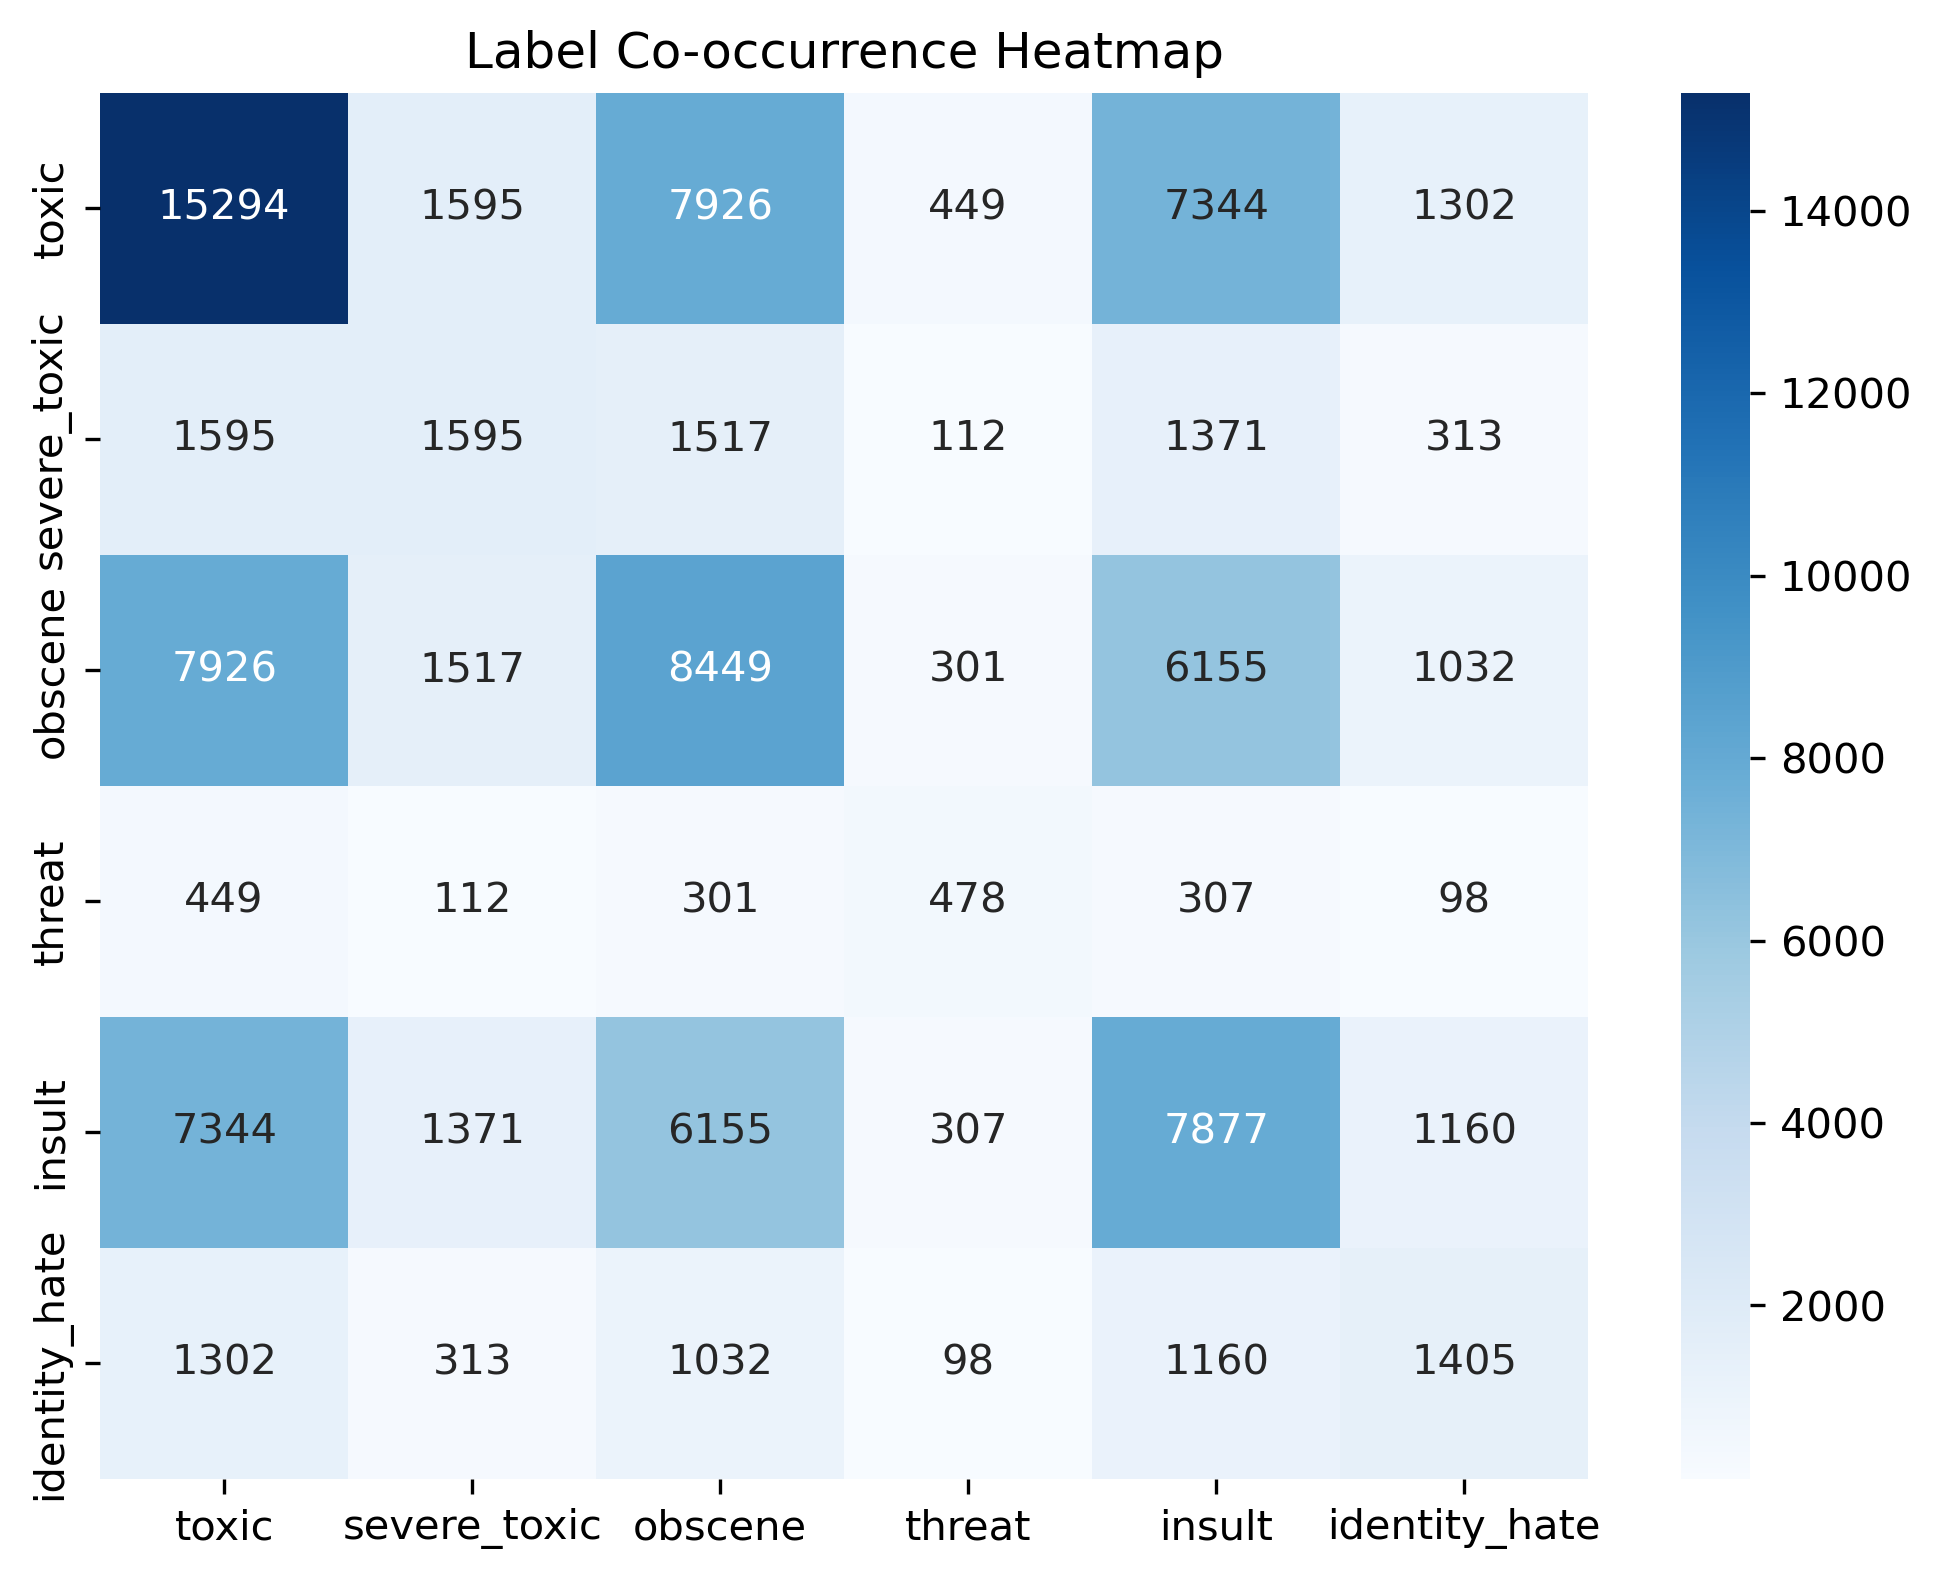

In [8]:
co_occurrence = train_df[label_cols].T.dot(train_df[label_cols])
plt.figure(figsize=(8, 6), dpi=DPI)
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
plt.title("Label Co-occurrence Heatmap")
plt.show()


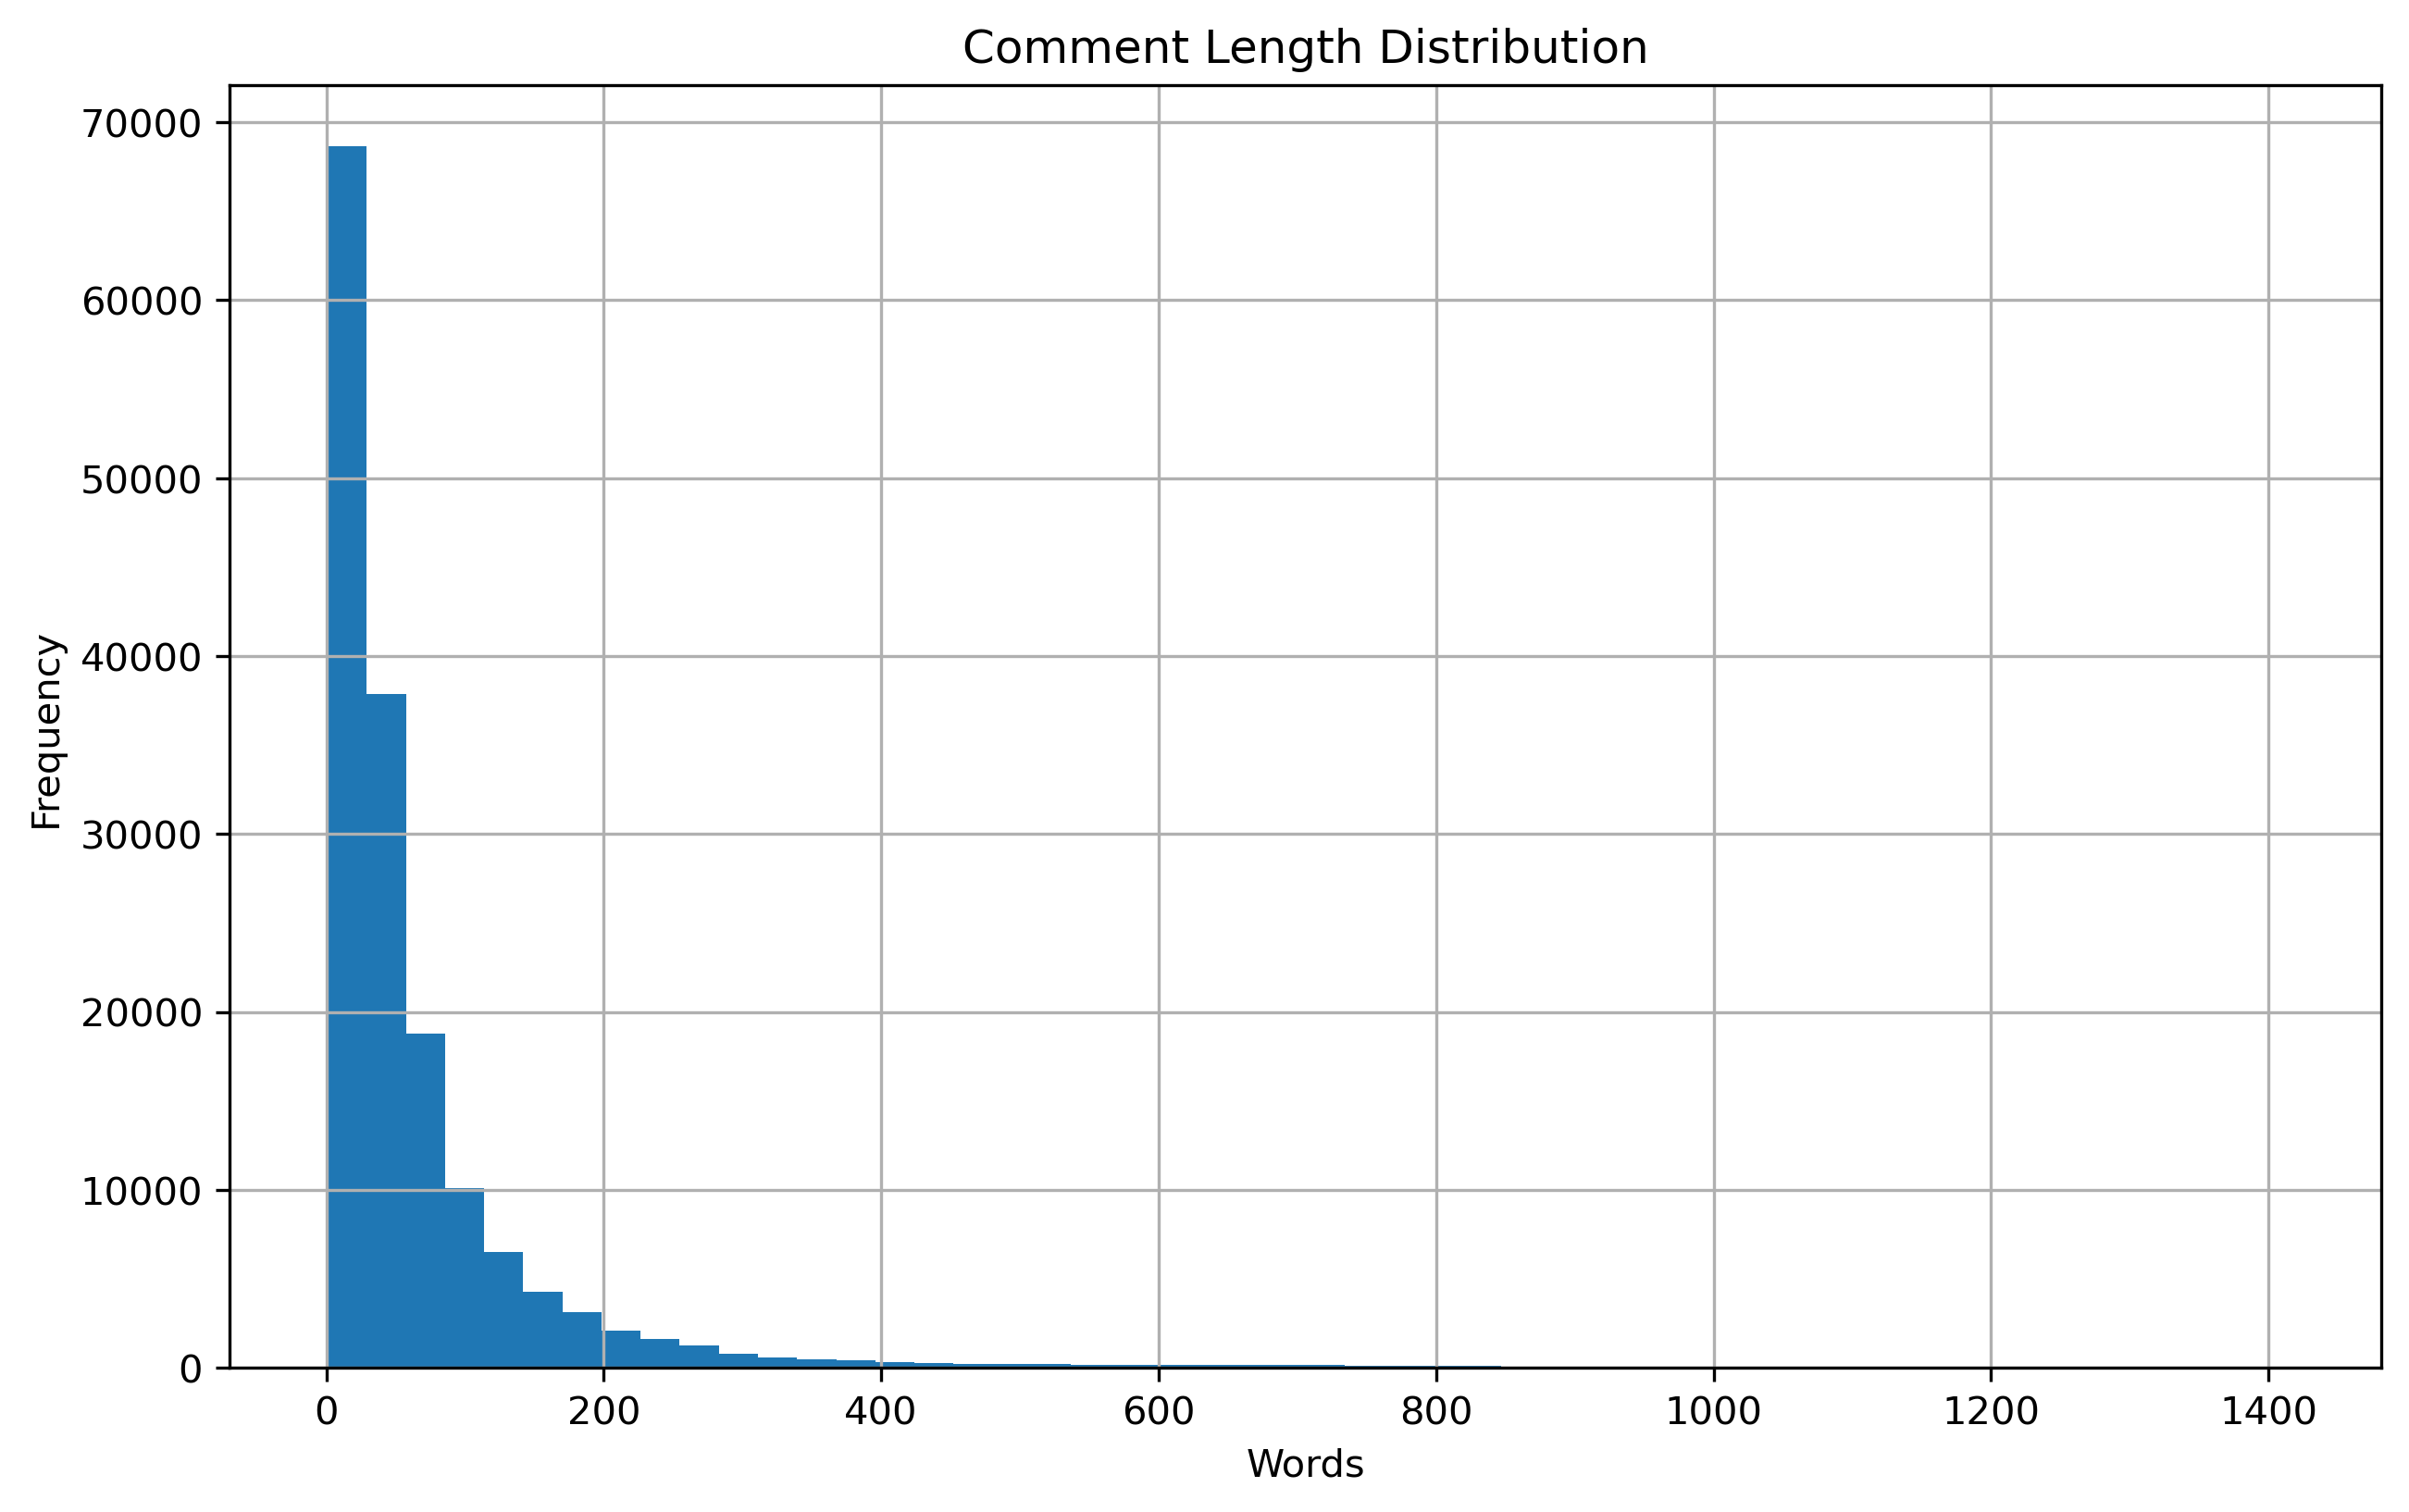

In [9]:
plt.figure(figsize=(10, 6), dpi=DPI)
train_df['comment_length'] = train_df['comment_text'].apply(lambda x: len(str(x).split()))
train_df['comment_length'].hist(bins=50)
plt.title("Comment Length Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [10]:
train_df['cleaned'] = train_df['comment_text'].apply(clean_text)
train_df['lemmatized'] = train_df['cleaned'].apply(lemmatizing)
print(train_df[['comment_text', 'cleaned', 'lemmatized']].head())

                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                             cleaned  \
0  explanation\nwhy the edits made under my usern...   
1  daww he matches this background colour im seem...   
2  hey man im really not trying to edit war its j...   
3  \nmore\ni cant make any real suggestions on im...   
4  you sir are my hero any chance you remember wh...   

                                          lemmatized  
0  [explanation, why, the, edits, made, under, my...  
1  [daww, he, match, this, background, colour, im...  
2  [hey, man, im, really, not, trying, to, edit, ...  
3  [more, i, cant, make, any, real, suggestion, o...  
4  [you, sir, are, my, hero, any, chance, you, re..

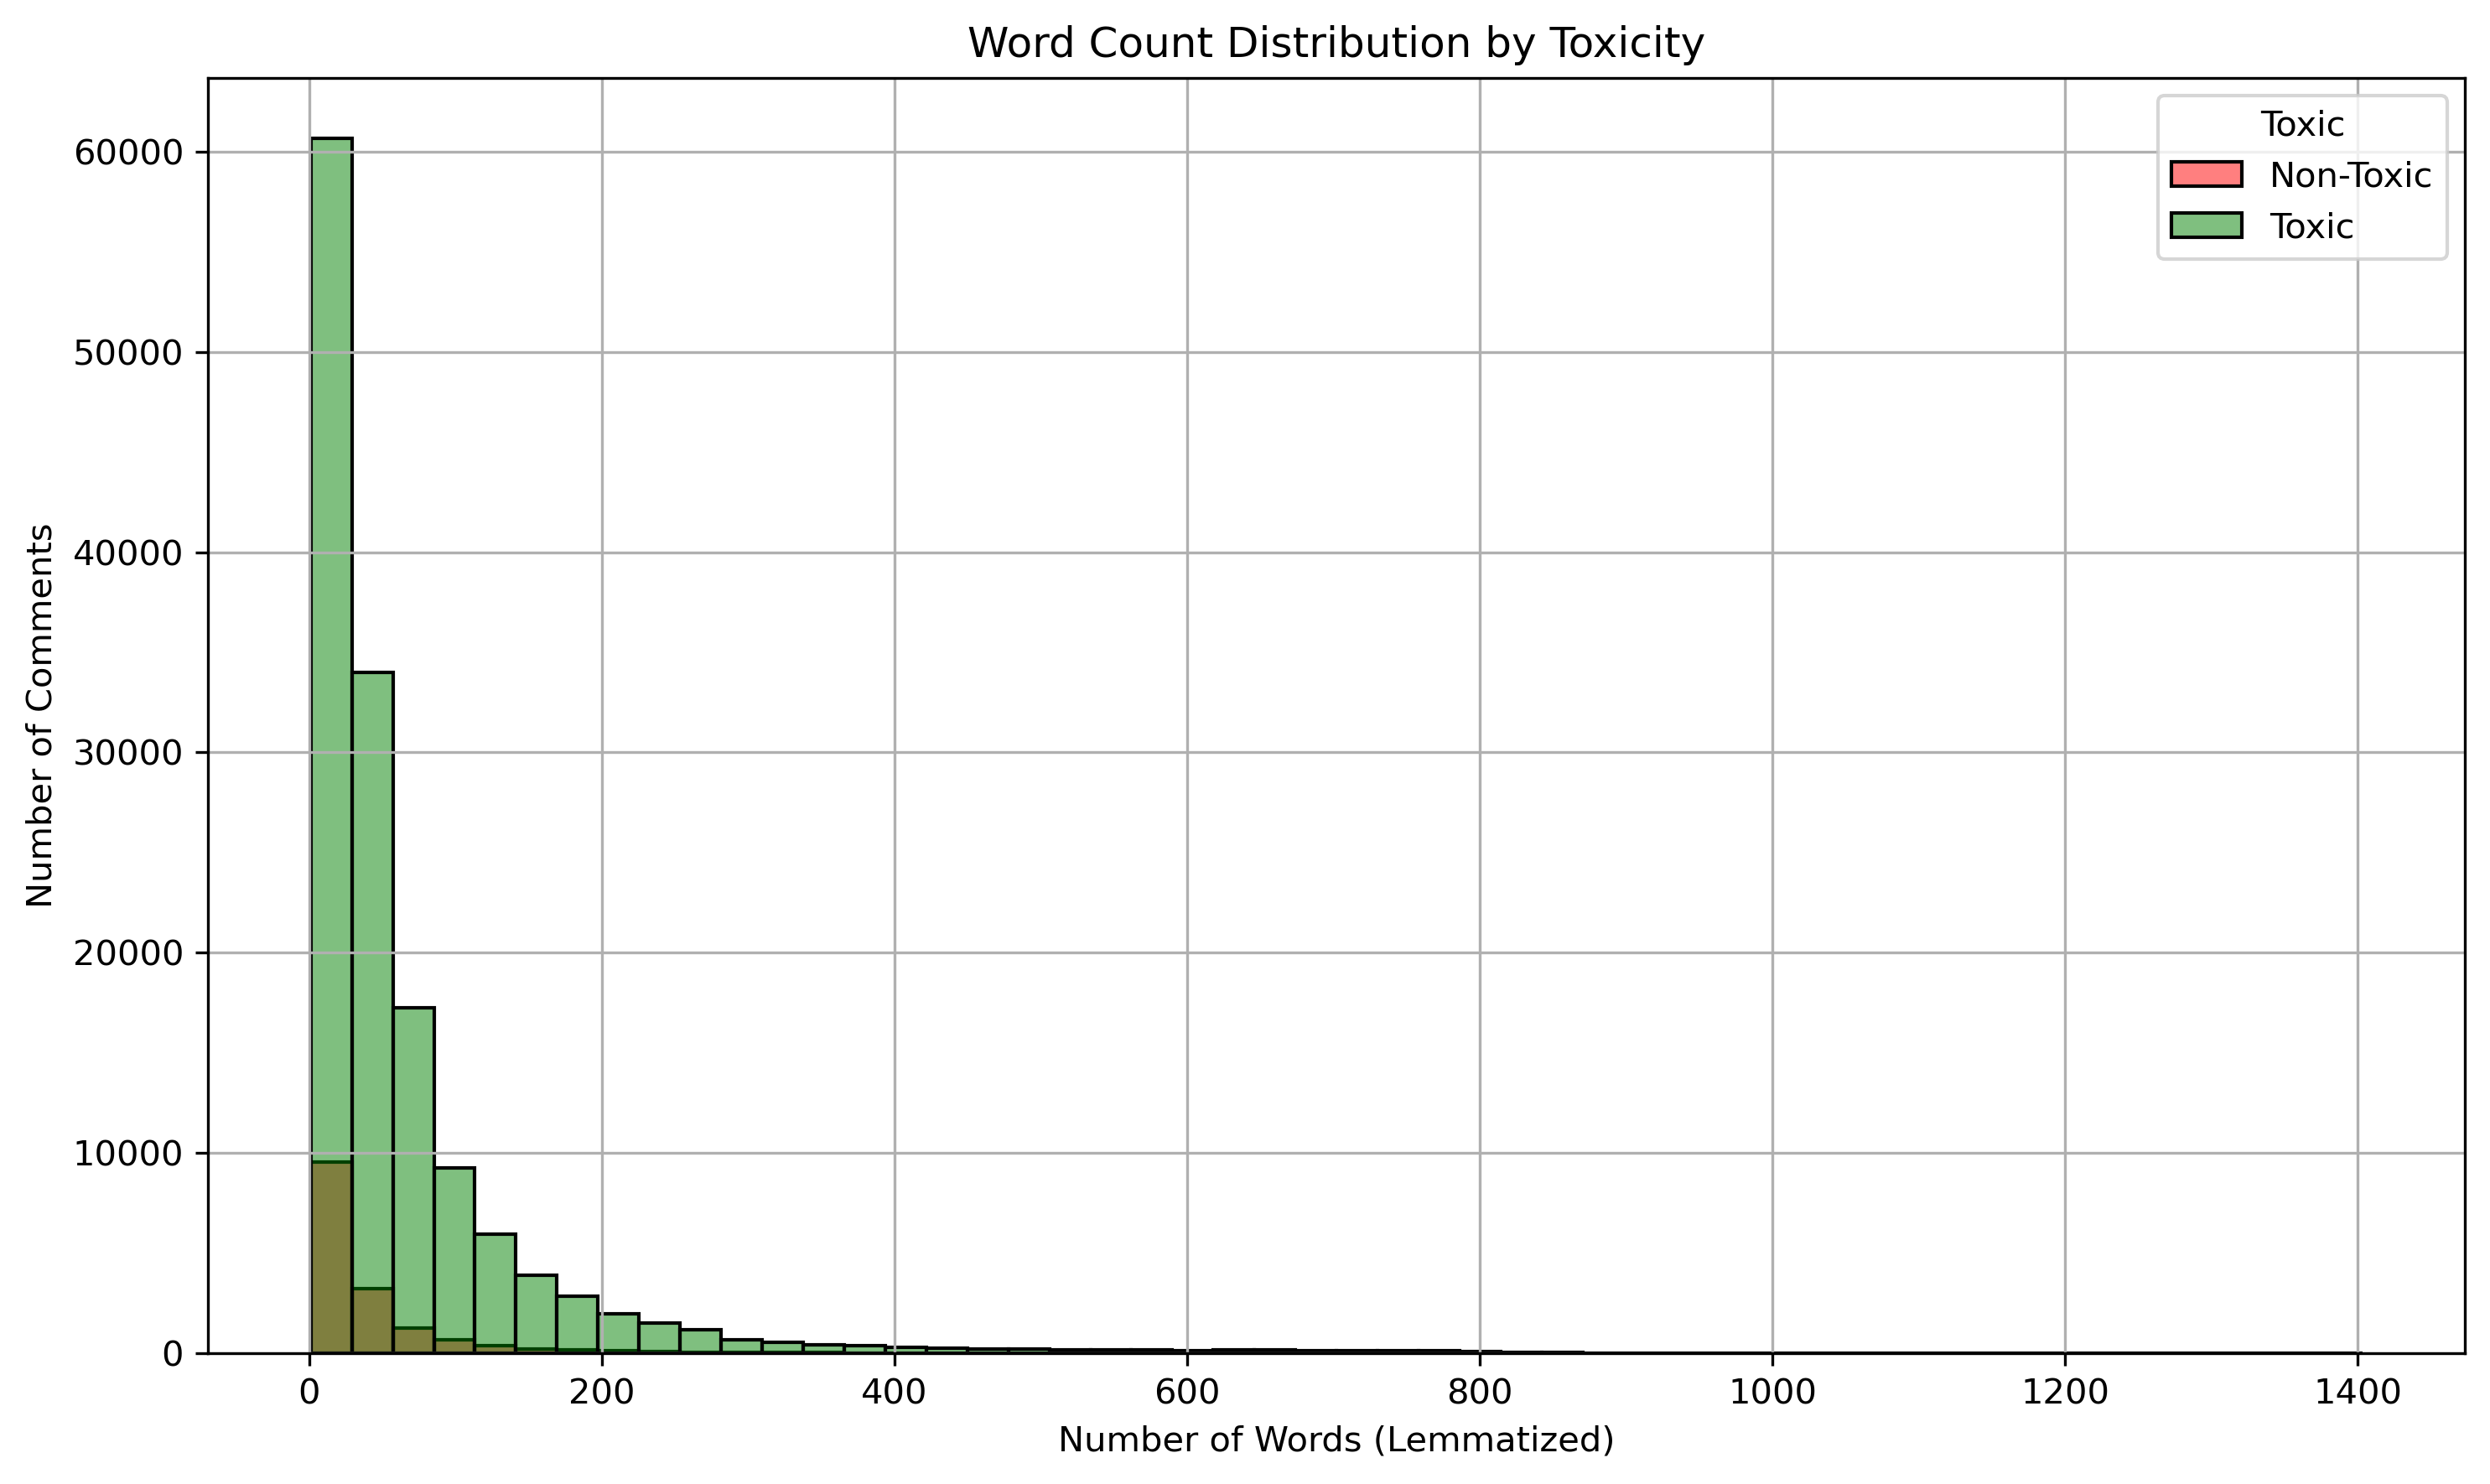

In [17]:
# Set figure size
plt.figure(figsize=(10, 6), dpi=DPI)

label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_df['is_toxic'] = train_df[label_cols].sum(axis=1) > 0

# Plot histograms
sns.histplot(data=train_df, x='word_count', hue='is_toxic', bins=50, palette={False: 'green', True: 'red'})

# Plot settings
plt.title('Word Count Distribution by Toxicity')
plt.xlabel('Number of Words (Lemmatized)')
plt.ylabel('Number of Comments')
plt.legend(title='Toxic', labels=['Non-Toxic', 'Toxic'])
plt.grid(True)
plt.tight_layout()
plt.show()


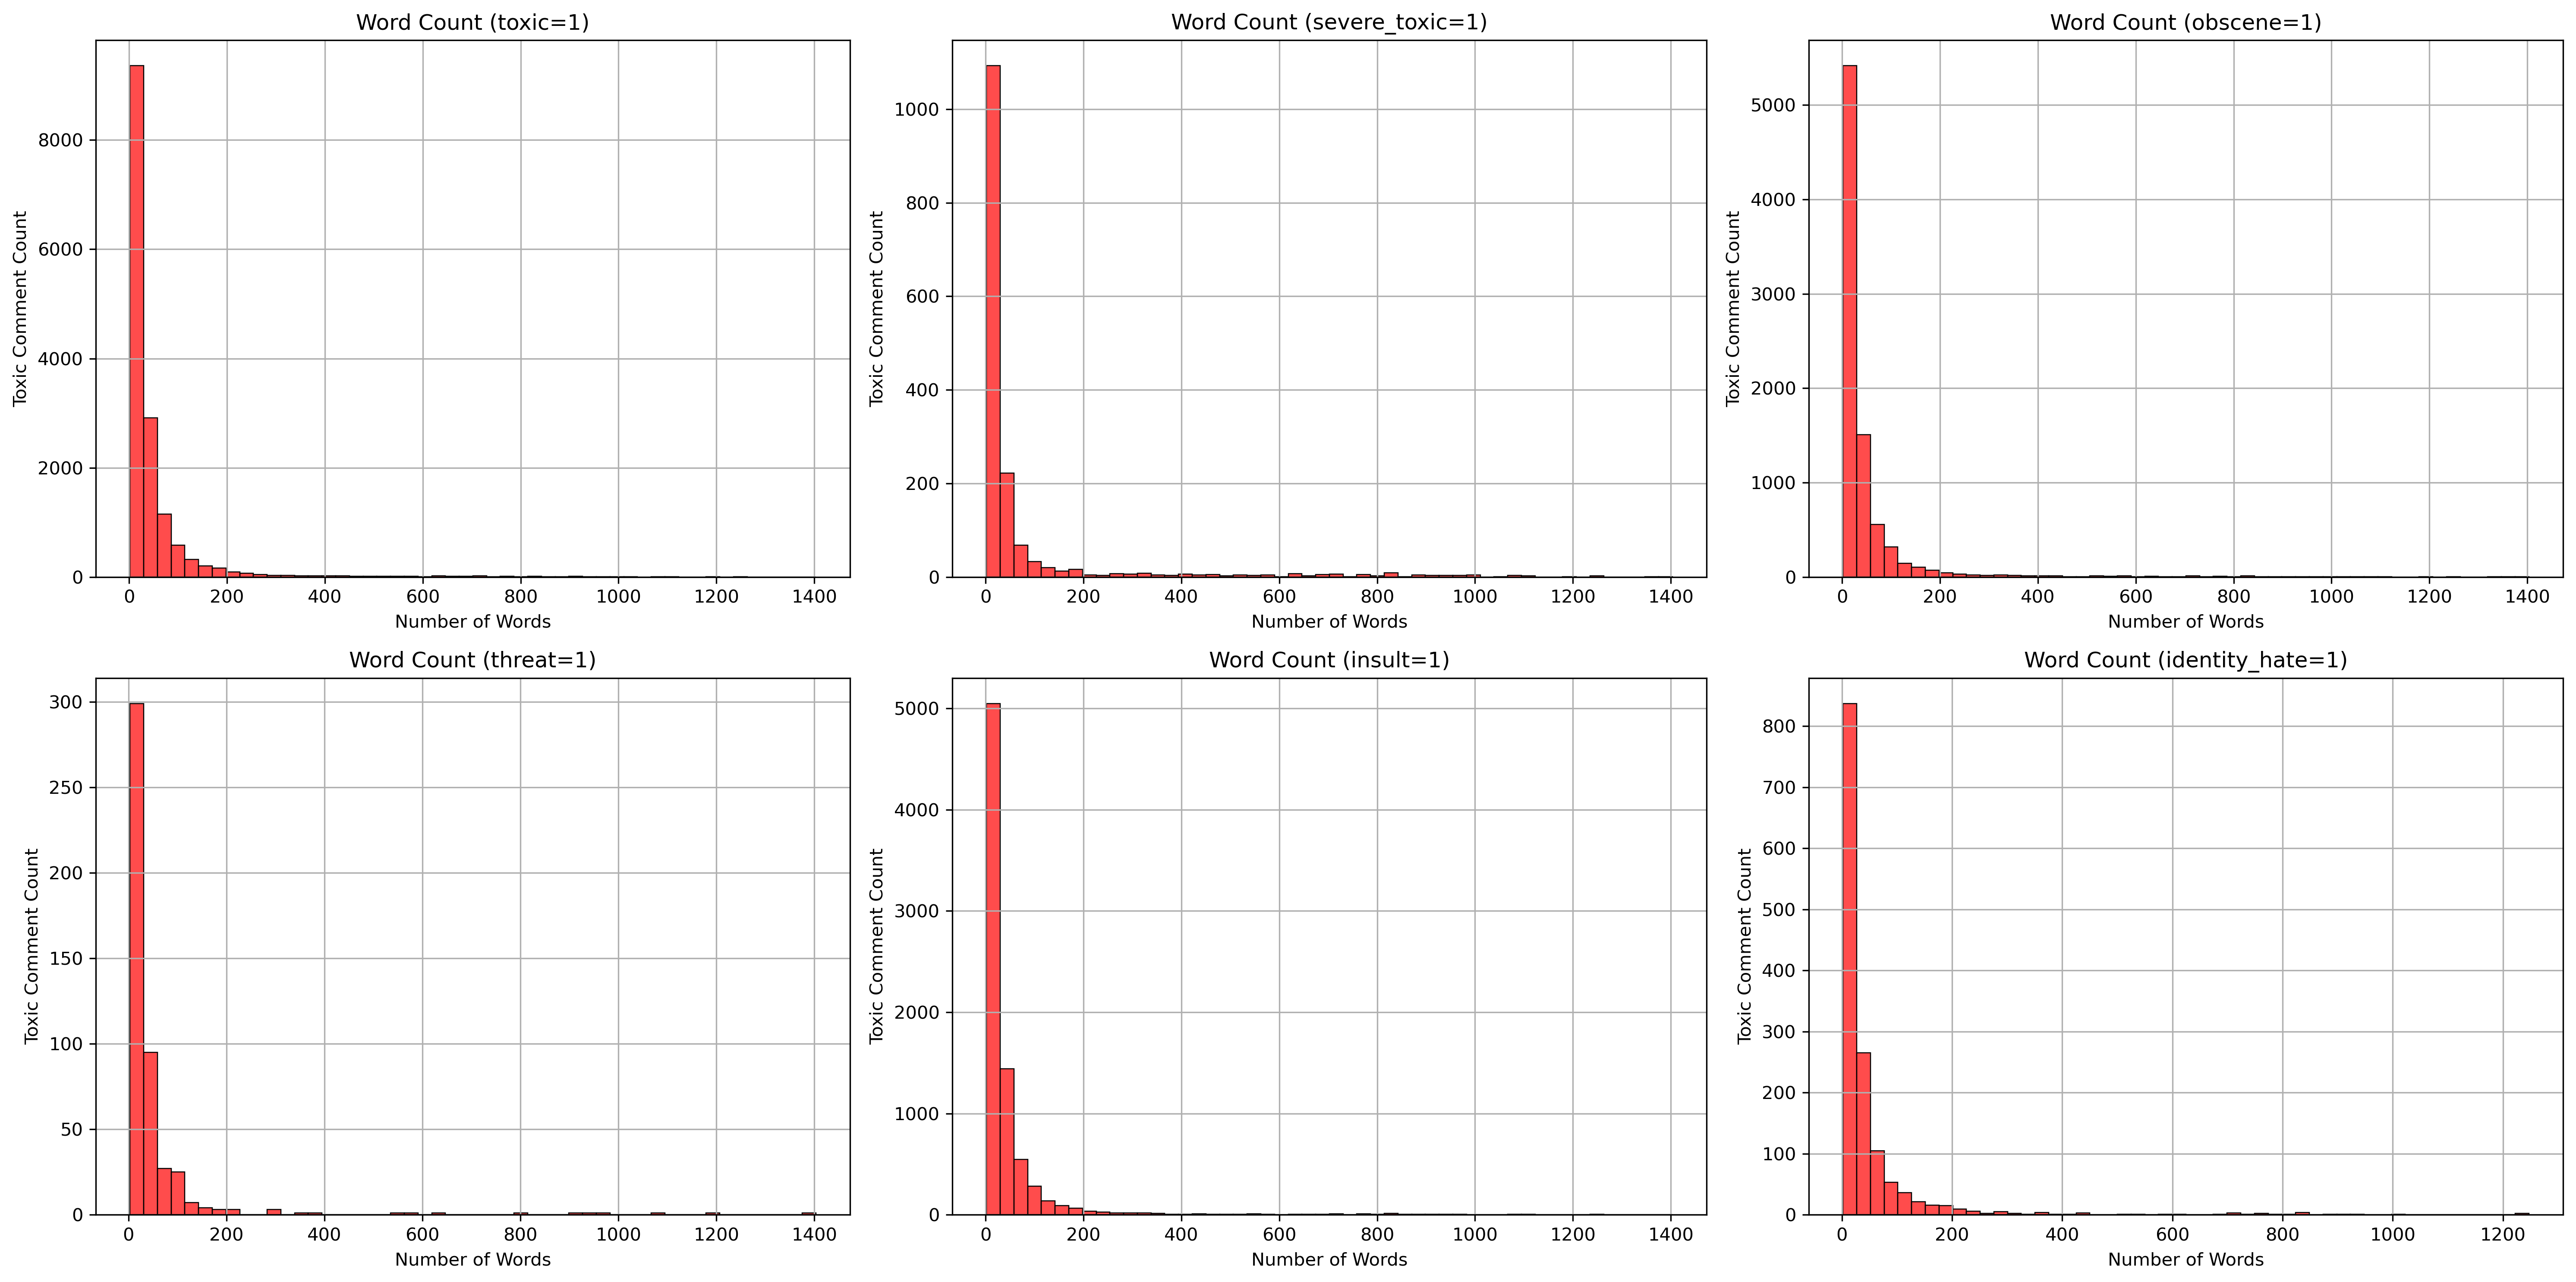

In [23]:
# Define toxicity labels
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Plot settings
plt.figure(figsize=(20, 10), dpi=DPI)

# Create one subplot per label (only for toxic comments)
for i, label in enumerate(label_cols, 1):
    plt.subplot(2, 3, i)
    filtered_df = train_df[train_df[label] == 1]
    sns.histplot(data=filtered_df, x='word_count', bins=50, color='red', alpha=0.7)
    plt.title(f'Word Count ({label}=1)')
    plt.xlabel('Number of Words')
    plt.ylabel('Toxic Comment Count')
    plt.grid(True)

plt.tight_layout()
plt.show()